## 単回帰モデル

In [32]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

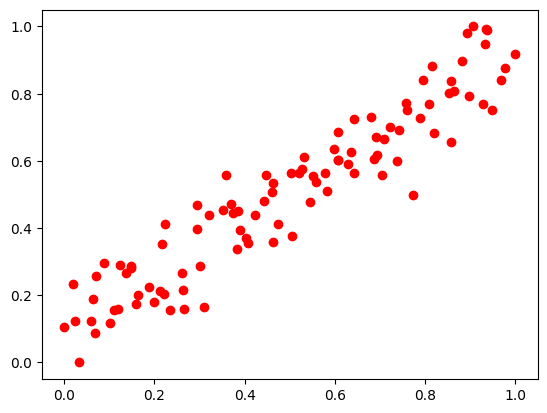

In [42]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output, bias=True)
        #nn.init.zeros_(self.l1.weight)
        #nn.init.zeros_(self.l1.bias)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

W = 50
B = 1

x = np.arange(100) + np.random.randn(100)
y = W * x + B + 500 * np.random.randn(100)

inputs = torch.tensor((x - x.min()) / (x.max() - x.min())).view(-1, 1).float()
labels = torch.tensor((y - y.min()) / (y.max() - y.min())).view(-1, 1).float()
n_input = 1
n_output = 1

net = Net(n_input, n_output)
outputs = net(inputs)

plt.scatter(inputs, labels, c='r')

In [43]:
for param in net.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[0.1612]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([-0.5721], requires_grad=True))


In [44]:
criterion = nn.MSELoss()
loss = criterion(outputs, labels)
loss.backward()


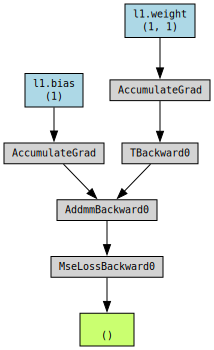

In [45]:
import torch.optim as optim
from torchviz import make_dot

lr = 0.0001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [46]:
optimizer.step()
optimizer.zero_grad()

In [47]:
num_epochs = 2000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 200 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.3f}')


Epoch / Loss = 0 / 0.519
Epoch / Loss = 200 / 0.319
Epoch / Loss = 400 / 0.193
Epoch / Loss = 600 / 0.118
Epoch / Loss = 800 / 0.073
Epoch / Loss = 1000 / 0.046
Epoch / Loss = 1200 / 0.030
Epoch / Loss = 1400 / 0.020
Epoch / Loss = 1600 / 0.014
Epoch / Loss = 1800 / 0.010


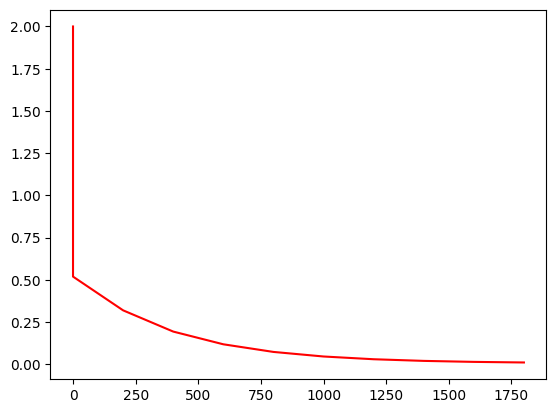

In [48]:
plt.plot(history[:, 0], history[:, 1], 'r')

In [49]:
print(f'{net.l1.weight} / {net.l1.bias}')

Parameter containing:
tensor([[0.5804]], requires_grad=True) / Parameter containing:
tensor([0.1461], requires_grad=True)


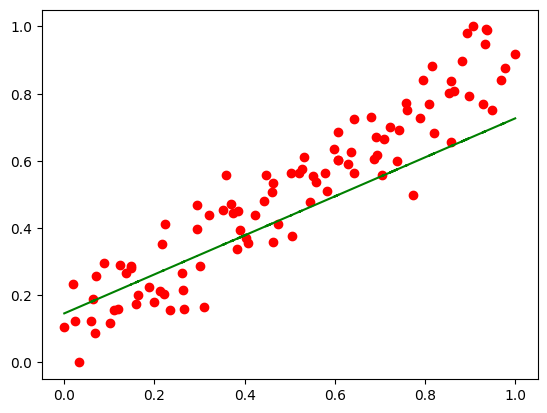

In [50]:
plt.scatter(inputs.data.numpy(), labels.data.numpy(), c='r')
plt.plot(inputs.data.numpy(), net(inputs).data.numpy(), c='g')
